# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

# import time
# import math

# import json
# import requests
# import gmaps
# from sodapy import Socrata
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
# from shapely.geometry.polygon import Polygon

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Read in data

In [2]:
df = pd.read_csv('data/venue_neighborhood_category.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,venue,address,latitude,longitude,neighborhood,category
0,McDonald's,13749 N Highway 183,30.459677,-97.792390,ANDERSON MILL,Fast Food Restaurant
1,P. Terry's Burger Stand,13770 N Highway 183,30.461215,-97.795304,ANDERSON MILL,Burger Joint
2,Pluckers Wing Bar,11066 Pecan Park Blvd Ste G,30.468469,-97.803540,AVERY RANCH--LAKELINE,Wings Joint
3,The Halal Gurus,13729 US-183 suite 890,30.458305,-97.791930,ANDERSON MILL,Middle Eastern Restaurant
4,Texas Roadhouse,"13435 N. US 183 SVRD NB, Bldg. 7",30.447093,-97.788729,ANDERSON MILL,Steakhouse


In [3]:
clusters_df = pd.read_csv('data/venue_neighborhood_category.csv')
clusters_df.drop(columns=['Unnamed: 0','venue', 'address', 'latitude', 'longitude'], inplace=True)
clusters_df.head()

,neighborhood,category
0,ANDERSON MILL,Fast Food Restaurant
1,ANDERSON MILL,Burger Joint
2,AVERY RANCH--LAKELINE,Wings Joint
3,ANDERSON MILL,Middle Eastern Restaurant
4,ANDERSON MILL,Steakhouse


In [4]:
#One hot encode the 'category' column and groupby the neighborhoods
clusters_df = pd.get_dummies(clusters_df, columns=['category'], prefix="", prefix_sep="").groupby('neighborhood').sum()
clusters_df

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Burrito Place,...,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
neighborhood,,,,,,,,,,,,,,,,,,,,,
ALLANDALE,2,2,0,0,1,0,0,0,3,1,...,0,1,0,0,0,1,0,0,1,0
ANDERSON MILL,1,0,1,1,0,0,1,0,3,0,...,1,3,0,0,0,0,0,0,0,0
AVERY RANCH--LAKELINE,2,1,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
BARTON CREEK MALL,1,1,1,1,2,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
BARTON HILLS,1,1,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WINDSOR HILLS,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
WINDSOR PARK,1,0,0,0,0,0,0,0,3,0,...,0,2,0,0,0,0,0,0,0,0
WINDSOR ROAD,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# clusters_df = pd.get_dummies(clusters_df, columns=['category'], prefix="", prefix_sep="").groupby('neighborhood').sum()
# clusters_df

#### Look at sillouhette score per number of clusters

In [6]:
kmax = 10

for k in range(2, kmax+1):
    model = KMeans(init='k-means++', n_clusters=k, random_state=42).fit(clusters_df)
    cluster_labels = model.labels_
        
    silhouette_avg = silhouette_score(clusters_df, cluster_labels)
    
    print(f"For n_clusters: {k}, average silhouette score: {silhouette_avg:.3f}")

For n_clusters: 2, average silhouette score: 0.720
For n_clusters: 3, average silhouette score: 0.249
For n_clusters: 4, average silhouette score: 0.192
For n_clusters: 5, average silhouette score: 0.146
For n_clusters: 6, average silhouette score: 0.209
For n_clusters: 7, average silhouette score: 0.123
For n_clusters: 8, average silhouette score: 0.102
For n_clusters: 9, average silhouette score: 0.120
For n_clusters: 10, average silhouette score: 0.084


In [7]:
# Function to sort values in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [8]:
# Run and fit the k-means clustering model
model = KMeans(init='k-means++', n_clusters=3, random_state=42)
model.fit(clusters_df)

KMeans(n_clusters=3, random_state=42)

In [9]:
# Check the neighborhood distrobution
pd.DataFrame(data=pd.Series(data=model.labels_).value_counts(), columns=['Label Count'])

,Label Count
0,68
1,27
2,1


In [10]:
clusters_df.insert(0, 'cluster_label', model.labels_)

In [11]:
clusters_df.head()

,cluster_label,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,...,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
neighborhood,,,,,,,,,,,,,,,,,,,,,
ALLANDALE,0,2,2,0,0,1,0,0,0,3,...,0,1,0,0,0,1,0,0,1,0
ANDERSON MILL,1,1,0,1,1,0,0,1,0,3,...,1,3,0,0,0,0,0,0,0,0
AVERY RANCH--LAKELINE,1,2,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
BARTON CREEK MALL,1,1,1,1,1,2,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
BARTON HILLS,0,1,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [20]:
# import plotly.express as px
# df = px.data.iris()
# fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
#                 "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
#                 "petal_width": "Petal Width", "petal_length": "Petal Length", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

In [15]:
# conda install -c conda-forge nbformat

In [16]:
# conda install -c conda-forge/label/gcc7 nbformat

In [49]:
# conda install -c conda-forge/label/broken nbformat

In [50]:
# conda install -c conda-forge/label/cf201901 nbformat

In [51]:
# conda install -c conda-forge/label/cf202003 nbformat

In [21]:

# clusters_df.drop(columns='cluster_label', inplace=True)
# clusters_df.insert(0, 'cluster_label', model.labels_)

In [21]:
label_group_df = clusters_df.groupby(['cluster_label']).sum()
num_top_venues = 20
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['cluster_label']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_10_df = pd.DataFrame(columns=columns)
top_10_df['cluster_label'] = label_group_df.index

for ind in np.arange(label_group_df.shape[0]):
    top_10_df.iloc[ind, 1:] = return_most_common_venues(label_group_df.iloc[ind, :], num_top_venues)

top_10_df.set_index('cluster_label', inplace=True)
top_10_df

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
cluster_label,,,,,,,,,,,,,,,,,,,,
0,Mexican Restaurant,Fast Food Restaurant,Serves Impossible Products,Food Truck,Pizza Place,Burger Joint,Restaurant,Taco Place,Sandwich Place,Café,Serves Oatly Products,Bakery,Chinese Restaurant,BBQ Joint,Asian Restaurant,Breakfast Spot,Vietnamese Restaurant,Fried Chicken Joint,Thai Restaurant,Seafood Restaurant
1,Mexican Restaurant,Fast Food Restaurant,Serves Impossible Products,Pizza Place,Taco Place,Food Truck,Sandwich Place,Burger Joint,BBQ Joint,Donut Shop,Chinese Restaurant,Café,Fried Chicken Joint,Asian Restaurant,Bakery,Sushi Restaurant,Italian Restaurant,Wings Joint,Serves Oatly Products,Seafood Restaurant
2,Serves Oatly Products,Serves Impossible Products,Mexican Restaurant,BBQ Joint,Pizza Place,Fried Chicken Joint,Italian Restaurant,Breakfast Spot,Taco Place,Steakhouse,Indian Restaurant,New American Restaurant,Restaurant,Fast Food Restaurant,Donut Shop,Mediterranean Restaurant,Sushi Restaurant,Burger Joint,Tex-Mex Restaurant,Vietnamese Restaurant


------- Cluster 0 ---------------------------------------------------------------
                               number_of_venues
Fast Food Restaurant                         47
Serves Impossible Products                   46
Food Truck                                   42
Burger Joint                                 29
Sandwich Place                               24
Serves Oatly Products                        20
BBQ Joint                                    15
Fried Chicken Joint                           9
Wings Joint                                   5
Vegetarian / Vegan Restaurant                 4
Comfort Food Restaurant                       3
Burrito Place                                 2


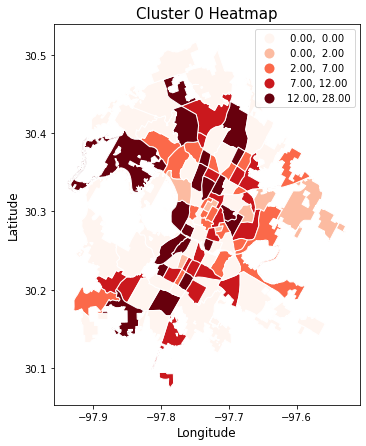

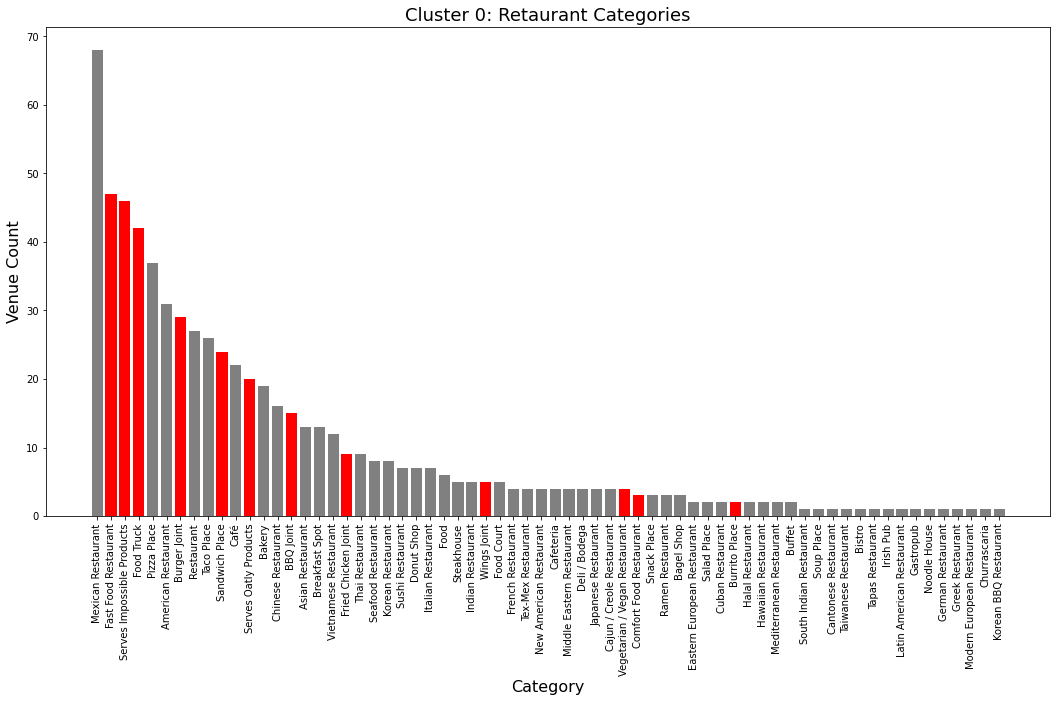

------- Cluster 1 ---------------------------------------------------------------
                               number_of_venues
Fast Food Restaurant                         62
Serves Impossible Products                   56
Food Truck                                   41
Sandwich Place                               35
Burger Joint                                 30
BBQ Joint                                    18
Fried Chicken Joint                          13
Wings Joint                                  11
Serves Oatly Products                        10
Vegetarian / Vegan Restaurant                 2
Burrito Place                                 1
Serves Beyond Products                        1


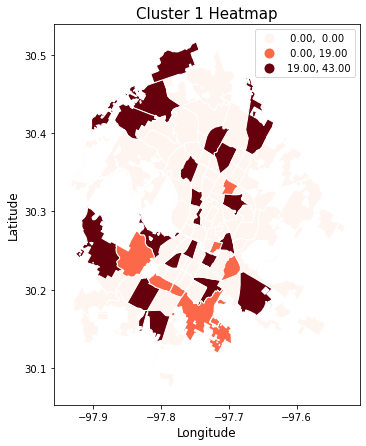

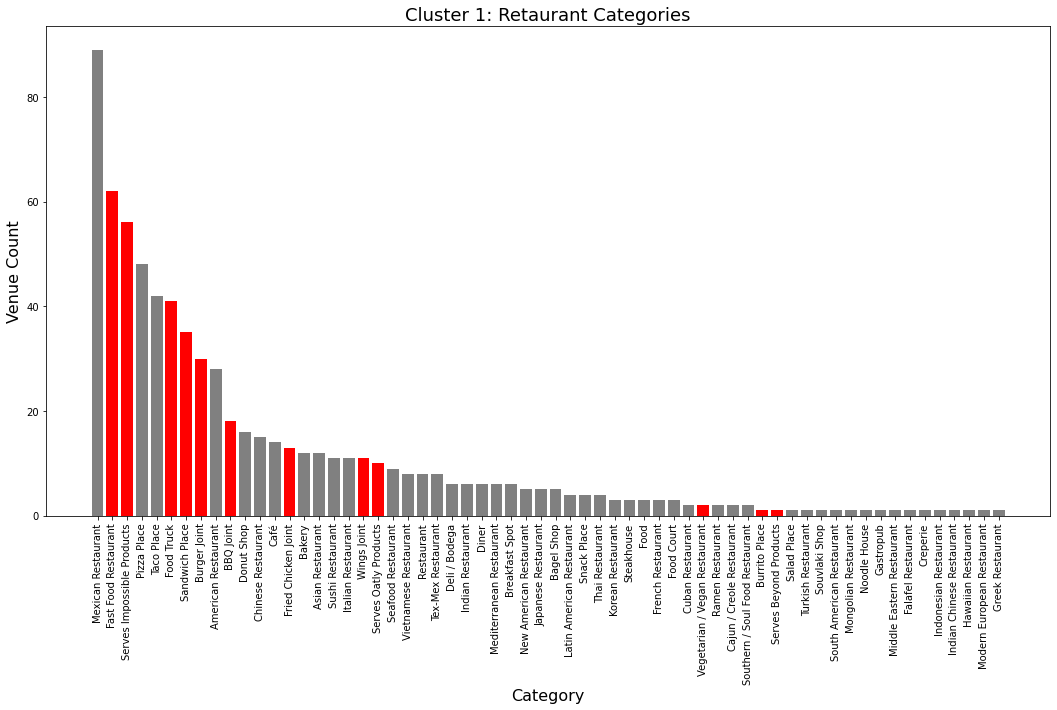

------- Cluster 2 ---------------------------------------------------------------
                            number_of_venues
Serves Oatly Products                     19
Serves Impossible Products                10
BBQ Joint                                  3
Fried Chicken Joint                        3
Fast Food Restaurant                       1
Burger Joint                               1


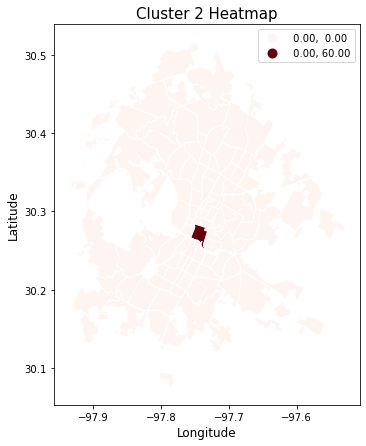

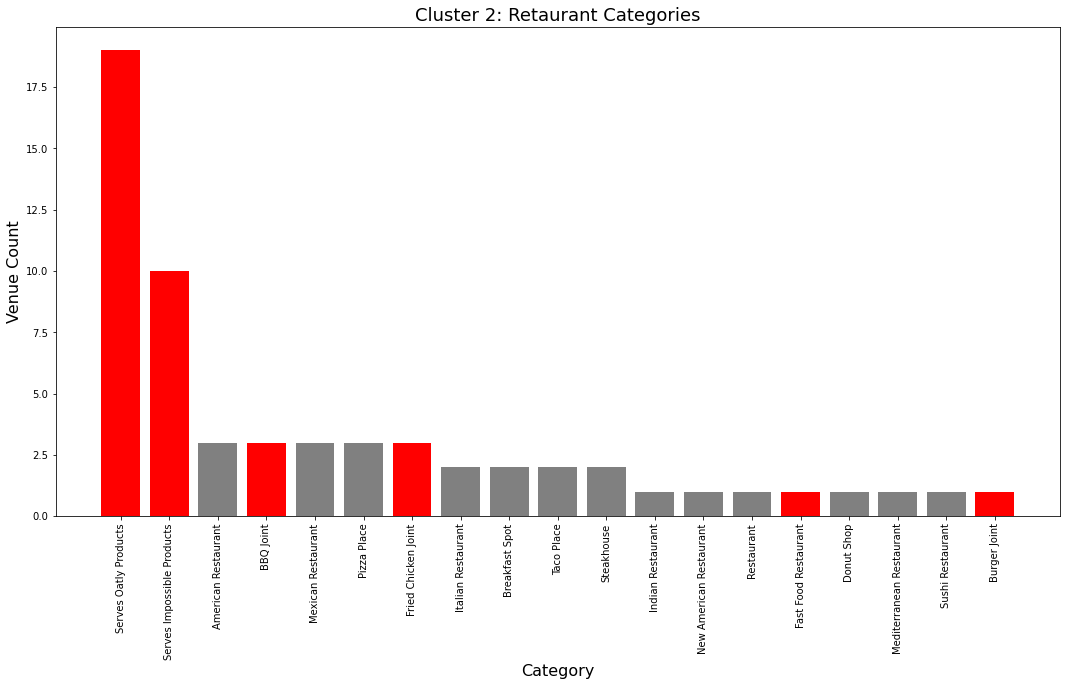

In [14]:
#Categories of interest
of_interest = ['Serves Impossible Products', 'Serves Beyond Products', 'Serves Oatly Products', 'Fast Food Restaurant', 'Burger Joint', 
               'Wings Joint', 'Sandwich Place','BBQ Joint','Fried Chicken Joint',
               'Burger Joint', 'Vegetarian / Vegan Restaurant', 'Burrito Place', 
               'Food Truck','Comfort Food Restaurant']

#Read in the ATX shapefile 
atx = gpd.GeoDataFrame.from_file('data/Neighborhoods/')

#Create for loop
for label in label_group_df.index:
    #bar
    cluster_df = pd.DataFrame(data=label_group_df.T[label].sort_values(ascending=False))
    cluster_df.rename(columns={label: "number_of_venues"},inplace=True)
    cluster_df = cluster_df[cluster_df['number_of_venues'] > 0]
    
    
    print(f'------- Cluster {label} ---------------------------------------------------------------')
    print(cluster_df.loc[[i for i in cluster_df.index if i in of_interest]])
    #map
    num_list = []
    for i in atx['neighname']:
        try:
            label_df = clusters_df[clusters_df['cluster_label'] == label]
            num_list.append(int(label_df[label_df.index == i].drop(columns='cluster_label').T.sum()))
        except:
            num_list.append(0)
    atx['num_restaurants'] = num_list

    fig, ax = plt.subplots(figsize=(7, 7))
    atx.plot(column='num_restaurants',
             cmap='Reds', 
             ax=ax, 
             scheme='quantiles',
             edgecolor='white',
            legend=True)
    plt.title(f"Cluster {label} Heatmap", fontsize=15)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.savefig(f'assets/4_clusters/cluster_{label}_heatmap.png')
    plt.show();
    
    plt.figure(figsize=(18,9))
    plt.title(f'Cluster {label}: Retaurant Categories', fontsize=18)
    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Venue Count', fontsize=16)
    plt.xticks(rotation = 90)
    clrs = ['red' if cluster_df.index[i] in of_interest else 'grey' for i in range(0, len(cluster_df))]
    plt.bar(cluster_df.index, cluster_df['number_of_venues'], color=clrs)
    plt.savefig(f'assets/4_clusters/cluster_{label}_bar.png')
    plt.show();

### Lets Dig into cluster 1 a bit more for example
- What is the 'of_interest' breakdown by neighborhood for cluster 1?
- What are the actual restaurants that make up cluster 1?
- Why are there so few gradients on the heatmap?
- Can we create a scoreing system for neighborhoods?
    - Sum of restaurants in 'of_interest' by neighborhood?
    - Break out impossible, beyond and oatly counts separate

#### Create a new 'cluster_label' column in the original `df`

In [15]:
# Create dictionary of {Neighborhood: Cluster Label} for mapping purposes
dict_df = clusters_df.reset_index()[['neighborhood', 'cluster_label']]
dict_ = dict(zip(dict_df.neighborhood, dict_df.cluster_label))

In [16]:
# Create 'cluster_label' columnn with list comprehension
df['cluster_label'] = [dict_[i] for i in df['neighborhood']]
df.head()

,venue,address,latitude,longitude,neighborhood,category,cluster_label
0,McDonald's,13749 N Highway 183,30.459677,-97.792390,ANDERSON MILL,Fast Food Restaurant,1
1,P. Terry's Burger Stand,13770 N Highway 183,30.461215,-97.795304,ANDERSON MILL,Burger Joint,1
2,Pluckers Wing Bar,11066 Pecan Park Blvd Ste G,30.468469,-97.803540,AVERY RANCH--LAKELINE,Wings Joint,1
3,The Halal Gurus,13729 US-183 suite 890,30.458305,-97.791930,ANDERSON MILL,Middle Eastern Restaurant,1
4,Texas Roadhouse,"13435 N. US 183 SVRD NB, Bldg. 7",30.447093,-97.788729,ANDERSON MILL,Steakhouse,1


What are the actual restaurants that make up cluster 1?

In [22]:
cluster1_df = df[df['cluster_label'] == 1]

In [31]:
# How many per neighborhood?
cluster1_df.groupby('neighborhood')['venue'].count().sort_values(ascending=False)

neighborhood
CHERRY CREEK             43
NORTH BURNET             40
ANDERSON MILL            36
AVERY RANCH--LAKELINE    36
FOUR POINTS              36
BERGSTROM                35
BARTON CREEK MALL        31
NORTHWEST HILLS          31
ROSEDALE                 30
WEST UNIVERSITY          28
RIVERSIDE                28
GOVALLE                  26
SLAUGHTER CREEK          25
WINDSOR PARK             24
BOULDIN CREEK            24
MCKINNEY                 23
TECH RIDGE               23
WEST OAK HILL            23
SOUTH LAMAR              22
NORTH LAMAR RUNDBERG     21
HOLLY                    19
EAST OAK HILL            19
SWEETBRIAR               18
BLUFF SPRINGS            18
MONTOPOLIS               17
GARRISON PARK            15
ST. JOHNS                15
Name: venue, dtype: int64

In [35]:
# How many of interest per neighborhood?
cluster1_of_interest_df = cluster1_df[cluster1_df['category'].isin(of_interest)]
cluster1_of_interest_df.groupby('neighborhood')['venue'].count().sort_values(ascending=False)

neighborhood
WEST UNIVERSITY          19
CHERRY CREEK             18
ANDERSON MILL            16
FOUR POINTS              16
WINDSOR PARK             16
AVERY RANCH--LAKELINE    14
MCKINNEY                 13
NORTH BURNET             13
RIVERSIDE                11
BARTON CREEK MALL        11
BERGSTROM                11
WEST OAK HILL            11
HOLLY                    10
SOUTH LAMAR              10
SLAUGHTER CREEK          10
BOULDIN CREEK             9
TECH RIDGE                9
NORTHWEST HILLS           9
EAST OAK HILL             9
GOVALLE                   8
ROSEDALE                  7
MONTOPOLIS                7
NORTH LAMAR RUNDBERG      5
ST. JOHNS                 5
SWEETBRIAR                5
BLUFF SPRINGS             4
GARRISON PARK             4
Name: venue, dtype: int64

In [39]:
cluster1_df.groupby('venue')['venue'].count().sort_values(ascending=False)

venue
Starbucks         32
McDonald's        14
Whataburger       11
Taco Bell         11
Burger King        9
                  ..
Hunan Ranch        1
Hummus Cuisine     1
Howdy Donuts       1
Howdy Donut        1
Ñoños Tacos #2     1
Name: venue, Length: 502, dtype: int64

### What is the 'of_interest' breakdown by neighborhood for each cluster?

In [17]:
cluster0_df = df[df['cluster_label'] == 0]
cluster0_df.shape

(667, 7)

In [18]:
cluster1_df = df[df['cluster_label'] == 1]
cluster1_df.shape

(706, 7)

In [19]:
cluster2_df = df[df['cluster_label'] == 2]
cluster2_df.shape

(60, 7)

### What are the actual restaurants that make up cluster 2?